In [1]:
#install xgboost
!pip install xgboost

In [2]:
!pip install lightgbm

In [3]:
#===== Set Up Library =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression # baseline model
from sklearn.ensemble import RandomForestRegressor #perwakilan bagging
from sklearn.tree import DecisionTreeRegressor #baseline untuk ensemble model
from xgboost import XGBRegressor #perwakilan dari gradient boosted #buatan rusia
from lightgbm import LGBMRegressor #perwakilan dari gradien boosted #buatan microsoft

#---- Classification -----

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#-----------------------

from sklearn.metrics import (r2_score,mean_absolute_error,mean_squared_error)
from sklearn.model_selection import train_test_split

def load_data():
  data = pd.read_csv("https://raw.githubusercontent.com/bayuzen19/dataset_ensemble_ngajar/main/realest.csv")
  data =  data.dropna()
  return data

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
df = load_data()

In [5]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [6]:
X = df.drop('Price',axis=1)
y = df['Price']

In [7]:
#==== Set Up model ====
xgb = XGBRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
linear = LinearRegression() #baseline model

In [8]:
#iterate model
ml = [('Linear Regression',linear),
      ('Decission Trees',dt),
         ('Random Forest',rf),
        ("Ligth GBM Regressor",lgbm),
         ('Xgboost',xgb)]

r2_train = []
r2_test = []
mae_train = []
mae_test = []
mse_train = []
mse_test = []
rmse_train = []
rmse_test = []
models = []

for model in ml:
  for x in range(0,11):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    model[1].fit(X_train,y_train)

    predict_train = model[1].predict(X_train)
    predict_test = model[1].predict(X_test)

    r2_score_train = r2_score(y_train,predict_train)
    r2_score_test = r2_score(y_test,predict_test)

    mae_score_train = mean_absolute_error(y_train,predict_train)
    mae_score_test = mean_absolute_error(y_test,predict_test)

    mse_score_train = mean_squared_error(y_train,predict_train)
    mse_score_test = mean_squared_error(y_test,predict_test)

    rmse_score_train = np.sqrt(mse_score_train)
    rmse_score_test = np.sqrt(mse_score_test)

    r2_train.append(r2_score_train)
    r2_test.append(r2_score_test)
    mae_train.append(mae_score_train)
    mae_test.append(mae_score_test)
    mse_train.append(mse_score_train)
    mse_test.append(mse_score_test)
    rmse_train.append(rmse_score_train)
    rmse_test.append(rmse_score_test)
    models.append(model[0])


df_metrics = pd.DataFrame({'model':models,
                           'r2_score_train':r2_train,
                           'r2_score_test':r2_test,
                           'MAE_train':mae_train,
                           'MAE_test':mae_test,
                           'MSE_train':mse_train,
                           'MSE_test':mse_test,
                           'RMSE_train':rmse_train,
                           'RMSE_test':rmse_test})

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 89, number of used features: 7
[LightGBM] [Info] Start training from score 56.752809
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

### 1. Definisi Model dan List

```python
ml = [('Linear Regression', linear),
      ('Decision Trees', dt),
      ('Random Forest', rf),
      ('Xgboost', xgb)]
```
- **ml**: List berisi tuple yang menyimpan nama model dan objek model masing-masing.
  - `'Linear Regression'`: Model regresi linear.
  - `'Decision Trees'`: Model pohon keputusan.
  - `'Random Forest'`: Model hutan acak.
  - `'Xgboost'`: Model XGBoost.

### 2. Inisialisasi List untuk Metrik Evaluasi

```python
r2_train = []
r2_test = []
mae_train = []
mae_test = []
mse_train = []
mse_test = []
rmse_train = []
rmse_test = []
models = []
```
- List untuk menyimpan hasil metrik evaluasi untuk setiap model selama iterasi.

### 3. Loop untuk Melatih dan Mengevaluasi Model

```python
for model in ml:
  for x in range(0, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model[1].fit(X_train, y_train)

    predict_train = model[1].predict(X_train)
    predict_test = model[1].predict(X_test)

    r2_score_train = r2_score(y_train, predict_train)
    r2_score_test = r2_score(y_test, predict_test)

    mae_score_train = mean_absolute_error(y_train, predict_train)
    mae_score_test = mean_absolute_error(y_test, predict_test)

    mse_score_train = mean_squared_error(y_train, predict_train)
    mse_score_test = mean_squared_error(y_test, predict_test)

    rmse_score_train = np.sqrt(mse_score_train)
    rmse_score_test = np.sqrt(mse_score_test)

    r2_train.append(r2_score_train)
    r2_test.append(r2_score_test)
    mae_train.append(mae_score_train)
    mae_test.append(mae_score_test)
    mse_train.append(mse_score_train)
    mse_test.append(mse_score_test)
    rmse_train.append(rmse_score_train)
    rmse_test.append(rmse_score_test)
    models.append(model[0])
```
- **Outer Loop**: Melakukan iterasi untuk setiap model dalam list `ml`.
- **Inner Loop**: Melakukan iterasi sebanyak 11 kali untuk setiap model (total 11 percobaan per model).
- **train_test_split**: Membagi dataset menjadi set pelatihan (70%) dan set pengujian (30%).
- **model[1].fit(X_train, y_train)**: Melatih model pada data pelatihan.
- **predict_train = model[1].predict(X_train)**: Membuat prediksi pada data pelatihan.
- **predict_test = model[1].predict(X_test)**: Membuat prediksi pada data pengujian.

### 4. Menghitung Metrik Evaluasi

- **r2_score_train**: Menghitung R² score untuk data pelatihan.
- **r2_score_test**: Menghitung R² score untuk data pengujian.
- **mae_score_train**: Menghitung Mean Absolute Error (MAE) untuk data pelatihan.
- **mae_score_test**: Menghitung MAE untuk data pengujian.
- **mse_score_train**: Menghitung Mean Squared Error (MSE) untuk data pelatihan.
- **mse_score_test**: Menghitung MSE untuk data pengujian.
- **rmse_score_train**: Menghitung Root Mean Squared Error (RMSE) untuk data pelatihan.
- **rmse_score_test**: Menghitung RMSE untuk data pengujian.

### 5. Menyimpan Hasil Metrik Evaluasi ke Dalam List

- Menyimpan setiap metrik evaluasi ke dalam list yang sesuai (`r2_train`, `r2_test`, `mae_train`, `mae_test`, `mse_train`, `mse_test`, `rmse_train`, `rmse_test`).
- Menyimpan nama model ke dalam list `models`.

### 6. Membuat DataFrame untuk Metrik Evaluasi

```python
df_metrics = pd.DataFrame({'model': models,
                           'r2_score_train': r2_train,
                           'r2_score_test': r2_test,
                           'MAE_train': mae_train,
                           'MAE_test': mae_test,
                           'MSE_train': mse_train,
                           'MSE_test': mse_test,
                           'RMSE_train': rmse_train,
                           'RMSE_test': rmse_test})
```
- **df_metrics**: Membuat DataFrame dari hasil evaluasi, yang berisi nama model dan metrik evaluasi untuk data pelatihan dan pengujian.

### Penjelasan Keseluruhan

Kode ini bertujuan untuk mengevaluasi beberapa model machine learning (Linear Regression, Decision Trees, Random Forest, dan XGBoost) menggunakan berbagai metrik evaluasi (R², MAE, MSE, RMSE). Proses ini melibatkan:

1. Melakukan train-test split sebanyak 11 kali untuk setiap model.
2. Melatih model pada data pelatihan dan melakukan prediksi pada data pelatihan dan pengujian.
3. Menghitung dan menyimpan metrik evaluasi untuk setiap iterasi.
4. Menyimpan hasil evaluasi ke dalam DataFrame untuk analisis lebih lanjut.


In [9]:
df_metrics

,model,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,Linear Regression,0.703549,0.743300,6.033311,4.780864,54.492161,40.563035,7.381881,6.368912
1,Linear Regression,0.703958,0.719796,5.289713,6.529573,47.632970,59.142362,6.901664,7.690407
2,Linear Regression,0.741229,0.620752,5.425078,6.672715,44.624252,68.462640,6.680139,8.274215
3,Linear Regression,0.747831,0.541410,5.310492,5.671024,49.150862,59.408658,7.010768,7.707701
4,Linear Regression,0.778736,0.541361,4.968673,7.072640,40.460165,74.295922,6.360831,8.619508
5,Linear Regression,0.764057,0.323494,4.916092,6.413050,45.181465,69.759730,6.721716,8.352229
6,Linear Regression,0.679523,0.761250,5.450021,6.038087,48.326579,56.375194,6.951732,7.508342
7,Linear Regression,0.706575,0.699453,5.559676,5.547990,51.234780,53.280778,7.157847,7.299368
8,Linear Regression,0.750446,0.630477,4.992907,6.563066,44.017177,65.493699,6.634544,8.092818
9,Linear Regression,0.717262,0.700233,5.644917,5.448874,52.871699,45.953983,7.271293,6.778937


In [10]:
#visualize
train_metrics = [x for x in df_metrics.columns if '_train' in x]
test_metrics = [x for x in df_metrics.columns if '_test' in x]

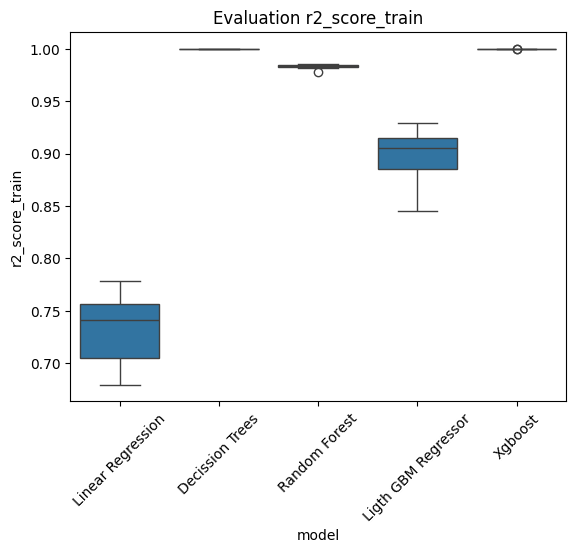

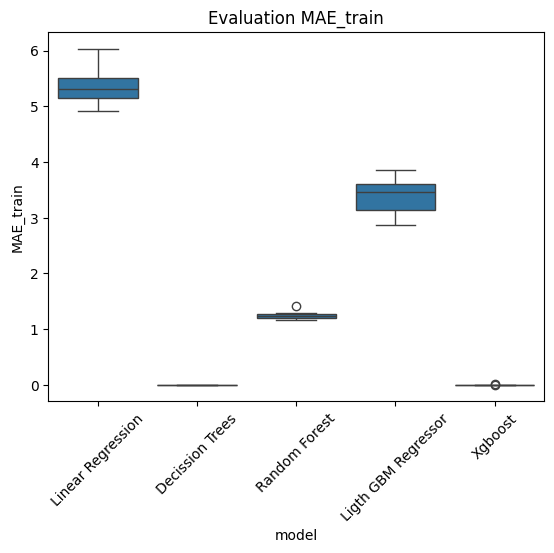

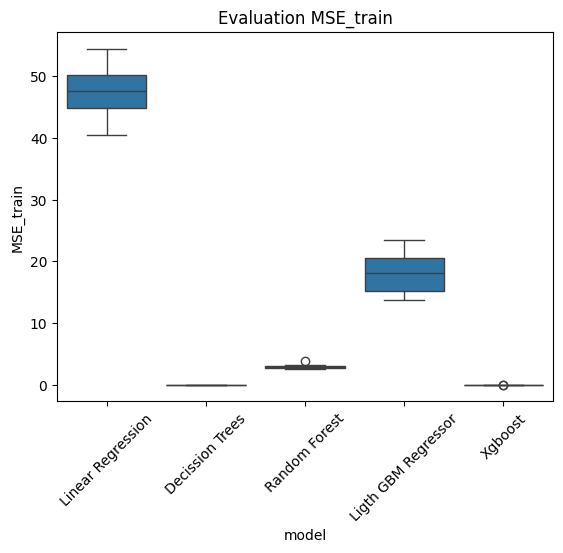

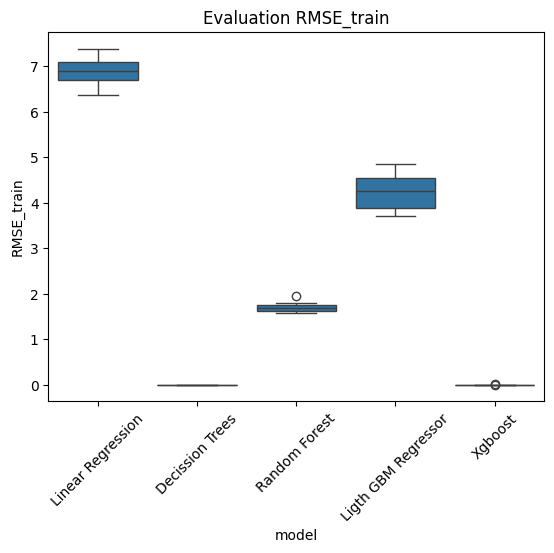

In [11]:
for train in train_metrics:
  plt.figure()
  sns.boxplot(data=df_metrics,x='model',y=train)
  plt.title(f"Evaluation {train}")
  plt.xticks(rotation=45)
  plt.show()

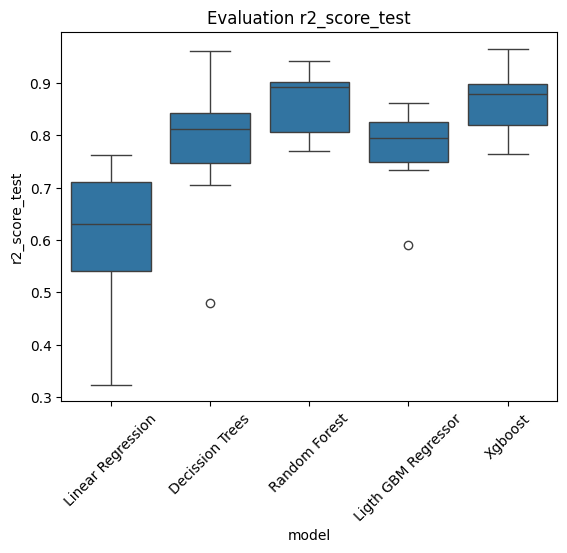

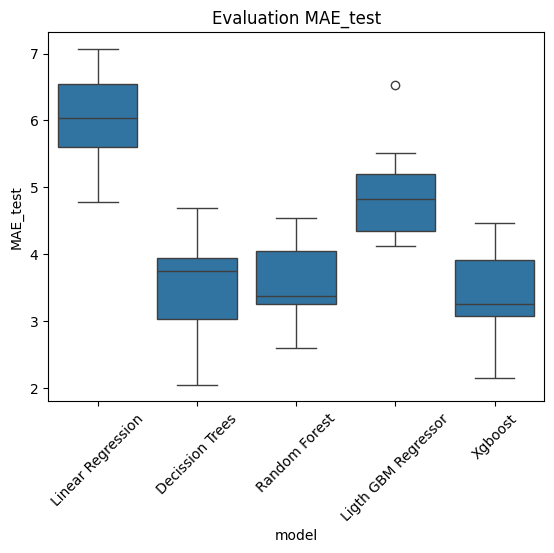

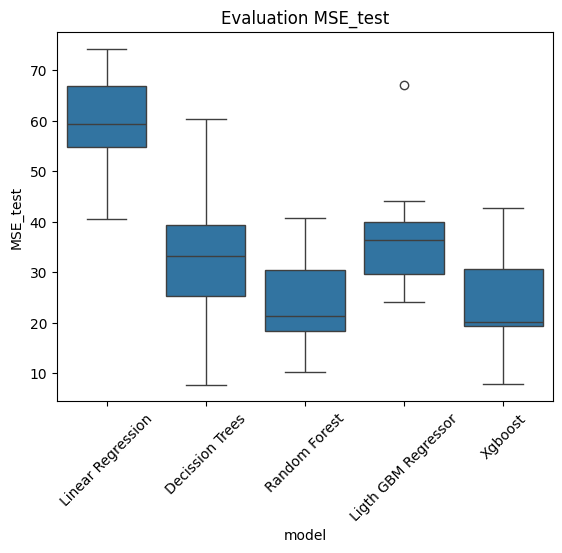

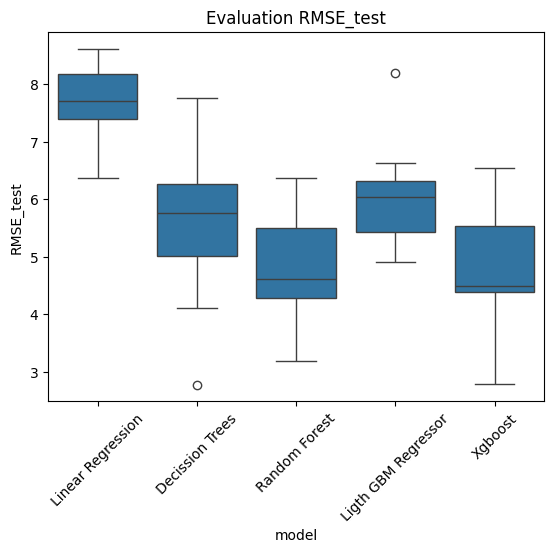

In [12]:
for test in test_metrics:
  plt.figure()
  sns.boxplot(data=df_metrics,x='model',y=test)
  plt.title(f"Evaluation {test}")
  plt.xticks(rotation=45)
  plt.show()

In [36]:
df_styled = round(df_metrics.groupby('model').mean(), 3)

df_styled = df_styled.style.highlight_min(color='yellow', axis=0)

df_styled

,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
model,,,,,,,,
Decission Trees,1.000000,0.785000,0.000000,3.466000,0.000000,32.371000,0.000000,5.545000
Ligth GBM Regressor,0.897000,0.778000,3.389000,4.920000,17.993000,37.211000,4.225000,6.033000
Linear Regression,0.732000,0.620000,5.354000,6.062000,47.681000,59.384000,6.899000,7.679000
Random Forest,0.983000,0.866000,1.247000,3.542000,2.925000,23.866000,1.708000,4.784000
Xgboost,1.000000,0.859000,0.001000,3.408000,0.000000,24.669000,0.002000,4.865000


In [35]:
df_styled = round(df_metrics.groupby('model').std(), 3)

df_styled = df_styled.style.highlight_min(color='yellow', axis=0)

df_styled

,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
model,,,,,,,,
Decission Trees,0.000000,0.123000,0.000000,0.758000,0.000000,14.119000,0.000000,1.337000
Ligth GBM Regressor,0.026000,0.075000,0.351000,0.703000,3.307000,12.121000,0.391000,0.943000
Linear Regression,0.032000,0.128000,0.329000,0.666000,4.136000,10.159000,0.300000,0.676000
Random Forest,0.002000,0.061000,0.070000,0.621000,0.360000,10.061000,0.103000,1.041000
Xgboost,0.000000,0.062000,0.001000,0.664000,0.000000,10.102000,0.001000,1.049000


# Tuning Parameter XGBoost

Tujuan, mempelajari range nilai dari tiap parameternya

In [15]:
#create train and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
learning_rate_list = [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

learning_rate = []
rmse_score = []


for eta in learning_rate_list:
  xgb = XGBRegressor(learning_rate=eta,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  learning_rate.append(eta)


#create dataset eta
df_eta = pd.DataFrame({'learning_rate':learning_rate,
                       'rmse_score':rmse_score})

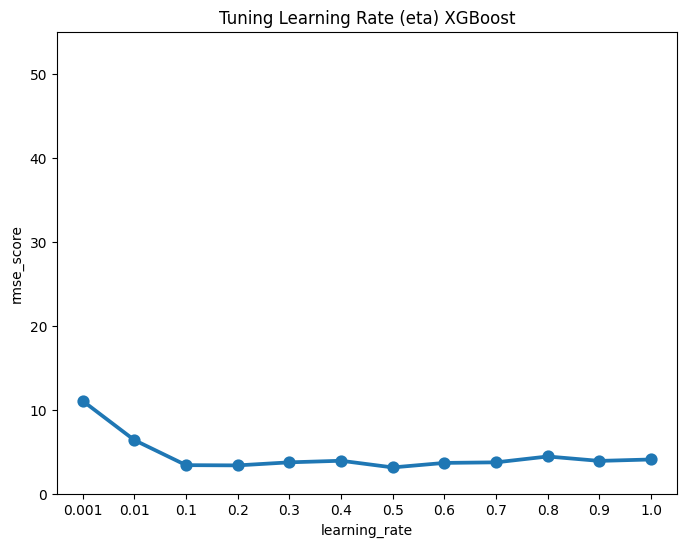

In [17]:
plt.figure(figsize=(8,6))
sns.pointplot(data=df_eta,x='learning_rate',y='rmse_score')
plt.title('Tuning Learning Rate (eta) XGBoost')
plt.ylim(0,55)
plt.show()

learning rate = 0.1

untuk tuning grid search / random search / bayesian optimization maka range 0.1-0.5

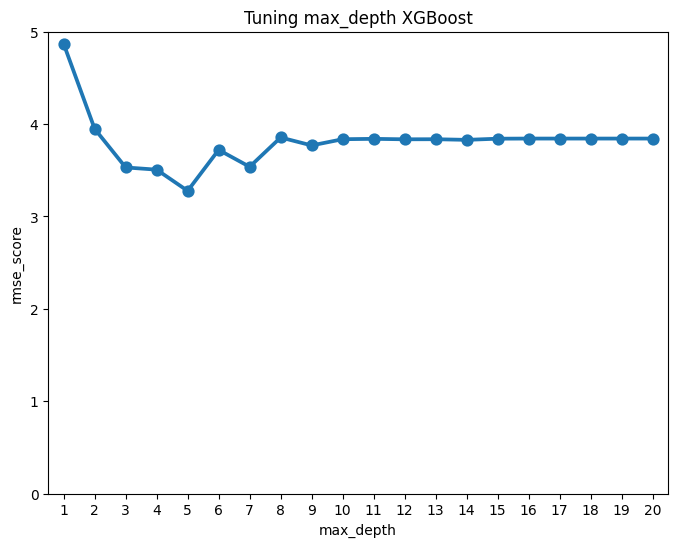

In [18]:
max_depth = []
rmse_score = []

for depth in range(1,21):
  xgb = XGBRegressor(max_depth=depth,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  max_depth.append(depth)


#create dataset eta
df_max_depth = pd.DataFrame({'max_depth':max_depth,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_max_depth,x='max_depth',y='rmse_score')
plt.title('Tuning max_depth XGBoost')
plt.ylim(0,5)
plt.show()

max_depth = 5

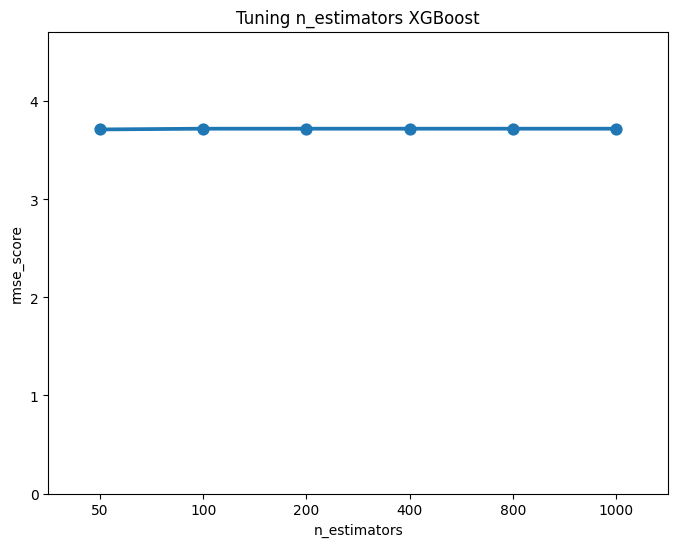

In [19]:
n_estimators = [] # jumlah decision tree
rmse_score = []

for estimator in [50, 100, 200, 400, 800,1000]:
  xgb = XGBRegressor(n_estimators=estimator).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  n_estimators.append(estimator)


#create dataset eta
df_estimator = pd.DataFrame({'n_estimators':n_estimators,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_estimator,x='n_estimators',y='rmse_score')
plt.title('Tuning n_estimators XGBoost')
plt.ylim(0,max(df_estimator['rmse_score'])+0.99)
plt.show()

tidak ada perubahan yang significant, sehingga n_estimator tidak digunakan

In [20]:
eta = 0.1
max_depth = 5

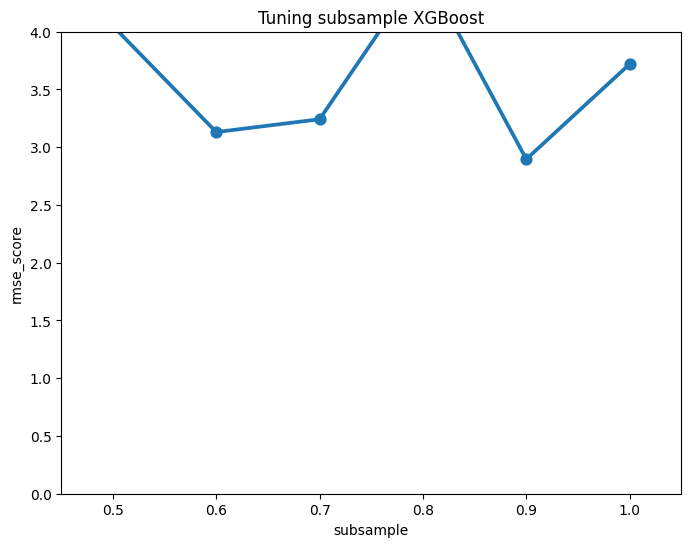

In [21]:
subsample = [] #melakukan pembagian data pada training kalo 0.5 artianya model hanya mengambil 50% datanya
rmse_score = []

for sub in [0.5,0.6, 0.7, 0.8, 0.9, 1]:
  xgb = XGBRegressor(subsample=sub,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  subsample.append(sub)


#create dataset eta
df_subsample = pd.DataFrame({'subsample':subsample,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_subsample,x='subsample',y='rmse_score')
plt.ylim([0,4])
plt.title('Tuning subsample XGBoost')
plt.show()

subsample = 0.9

In [22]:
eta = 0.1
max_depth = 5
subsample = 0.9

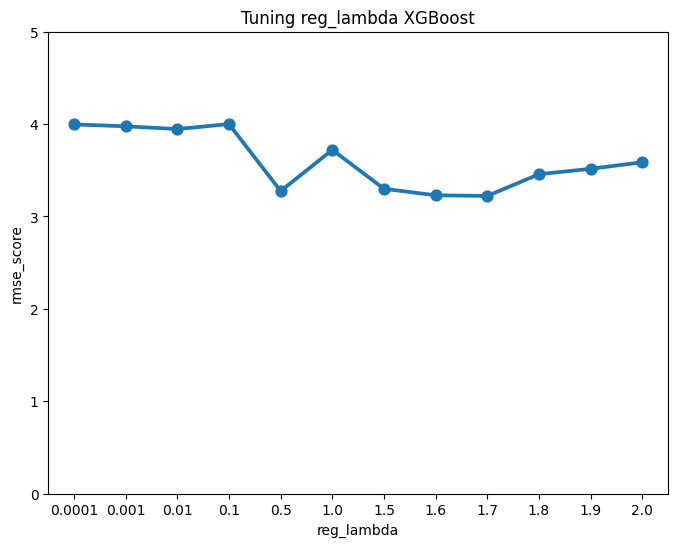

In [23]:
reg_lambda = [] #strength regulization l2
rmse_score = []

for lambda_ in [0.0001,0.001, 0.01, 0.1, 0.5, 1, 1.5,1.6,1.7,1.8,1.9,2]:
    xgb = XGBRegressor(reg_lambda=lambda_,random_state=42).fit(X_train,y_train)
    rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
    rmse_score.append(rmse)
    reg_lambda.append(lambda_)


#create dataset eta
df_reg_lambda = pd.DataFrame({'reg_lambda':reg_lambda,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_reg_lambda,x='reg_lambda',y='rmse_score')
plt.title('Tuning reg_lambda XGBoost')
plt.ylim(0,5)
plt.show()

reg_lambda = 0.5

# Perbandingan Tuning dan Tanpa Tuning

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train,y_train)


predict_train = xgb.predict(X_train)
predict_test = xgb.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9999999831143105
r2 score test 0.9028134114717375
MAE train 0.0012604145521528266
MAE test 2.822795183230669
MSE train 3.2384241319632973e-06
MSE test 13.837044373536722
RMSE train 0.0017995622056387207
RMSE test 3.7198177876794882


In [26]:
# Put all together
#tuning
xgb = XGBRegressor(learning_rate = 0.1,
                  max_depth = 5,
                  subsample = 0.9,
                  reg_lambda = 0.5,
                  random_state=42)

xgb.fit(X_train,y_train)

predict_train = xgb.predict(X_train)
predict_test = xgb.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.999787873885234
r2 score test 0.9347933164974259
MAE train 0.16409267468398878
MAE test 2.1698857820951023
MSE train 0.04068263410230879
MSE test 9.283871228939134
RMSE train 0.20169936564676844
RMSE test 3.04694457267262


# Bayesian Search

Jenis dari Hyperparameter tunning

In [27]:
pip install bayesian-optimization

In [28]:
from bayes_opt import BayesianOptimization #hyperparameter tuning
from sklearn.model_selection import cross_val_score

# Define the objective function to optimize
def xgb_cv(learning_rate, max_depth, subsample, reg_lambda):
    # Create XGBoost model with specified hyperparameters
    xgb = XGBRegressor(learning_rate=learning_rate,
                       max_depth=int(max_depth),
                       subsample=subsample,
                       reg_lambda=reg_lambda,
                       random_state=42)

    # Perform cross-validation with the XGBoost model
    cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculate the mean squared error
    mean_mse = -cv_scores.mean()  # Take the negative of the mean squared error

    return mean_mse

# Define the bounds for each hyperparameter
param_bounds = {'learning_rate': (0.1, 0.5),
                'max_depth': (5, 9),
                'subsample': (0.8, 1),
                'reg_lambda': (0.5, 1.7)}

# Initialize BayesianOptimization object with the objective function and parameter bounds
bayesian_optimizer = BayesianOptimization(f=xgb_cv, pbounds=param_bounds, random_state=42)

# Perform Bayesian Optimization
bayesian_optimizer.maximize(init_points=20, n_iter=10)

# Get the best hyperparameters
best_hyperparameters = bayesian_optimizer.max['params']
print("Best Hyperparameters:", best_hyperparameters)

|   iter    |  target   | learni... | max_depth | reg_la... | subsample |
-------------------------------------------------------------------------
| 1         | 28.71     | 0.2498    | 8.803     | 1.378     | 0.9197    |
| 2         | 27.11     | 0.1624    | 5.624     | 0.5697    | 0.9732    |
| 3         | 29.65     | 0.3404    | 7.832     | 0.5247    | 0.994     |
| 4         | 31.72     | 0.433     | 5.849     | 0.7182    | 0.8367    |
| 5         | 24.57     | 0.2217    | 7.099     | 1.018     | 0.8582    |
| 6         | 24.52     | 0.3447    | 5.558     | 0.8506    | 0.8733    |
| 7         | 27.23     | 0.2824    | 8.141     | 0.7396    | 0.9028    |
| 8         | 29.53     | 0.337     | 5.186     | 1.229     | 0.8341    |
| 9         | 27.14     | 0.126     | 8.796     | 1.659     | 0.9617    |
| 10        | 24.37     | 0.2218    | 5.391     | 1.321     | 0.888     |
| 11        | 29.76     | 0.1488    | 6.981     | 0.5413    | 0.9819    |
| 12        | 24.11     | 0.2035    | 

### 1. Mengimpor Pustaka yang Diperlukan

```python
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
```
- **BayesianOptimization**: Digunakan untuk melakukan optimasi hyperparameter menggunakan Bayesian Optimization.
- **cross_val_score**: Fungsi dari sklearn untuk melakukan cross-validation.

### 2. Mendefinisikan Fungsi Objektif untuk Dioptimalkan

```python
def xgb_cv(learning_rate, max_depth, subsample, reg_lambda):
    # Membuat model XGBoost dengan hyperparameter yang ditentukan
    xgb = XGBRegressor(learning_rate=learning_rate,
                       max_depth=int(max_depth),
                       subsample=subsample,
                       reg_lambda=reg_lambda,
                       random_state=42)

    # Melakukan cross-validation dengan model XGBoost
    cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Menghitung mean squared error
    mean_mse = -cv_scores.mean()  # Mengambil negatif dari mean squared error

    return mean_mse
```
- **xgb_cv**: Fungsi ini menerima hyperparameter XGBoost sebagai argumen.
- **XGBRegressor**: Model XGBoost dibuat dengan hyperparameter yang diberikan.
- **cross_val_score**: Melakukan cross-validation dengan 5 fold, mengembalikan nilai negatif dari mean squared error.
- **mean_mse**: Menghitung rata-rata mean squared error dari hasil cross-validation.

### 3. Mendefinisikan Batas untuk Setiap Hyperparameter

```python
param_bounds = {'learning_rate': (0.1, 0.6),
                'max_depth': (3, 11),
                'subsample': (0.5, 1),
                'reg_lambda': (0.1, 2)}
```
- **param_bounds**: Batas-batas untuk setiap hyperparameter yang akan dioptimalkan.

### 4. Inisialisasi Objek BayesianOptimization dengan Fungsi Objektif dan Batas Parameter

```python
bayesian_optimizer = BayesianOptimization(f=xgb_cv, pbounds=param_bounds, random_state=42)
```
- **bayesian_optimizer**: Objek BayesianOptimization diinisialisasi dengan fungsi objektif (`xgb_cv`) dan batas-batas hyperparameter (`param_bounds`).

### 5. Melakukan Optimasi Bayesian

```python
bayesian_optimizer.maximize(init_points=10, n_iter=10)
```
- **init_points=10**: Melakukan 10 iterasi awal dengan titik-titik acak sebelum memulai proses Bayesian Optimization.
- **n_iter=10**: Melakukan 10 iterasi optimasi setelah iterasi awal.

### 6. Mendapatkan Hyperparameter Terbaik

```python
best_hyperparameters = bayesian_optimizer.max['params']
print("Best Hyperparameters:", best_hyperparameters)
```
- **bayesian_optimizer.max['params']**: Mengambil hyperparameter terbaik yang ditemukan oleh optimasi Bayesian.
- **print**: Mencetak hyperparameter terbaik.

### Penjelasan Keseluruhan

- **Tujuan**: Kode ini bertujuan untuk mengoptimalkan hyperparameter model XGBoost menggunakan Bayesian Optimization untuk mencapai mean squared error (MSE) terendah.
- **Proses**:
  - **Fungsi Objektif**: Mendefinisikan fungsi objektif (`xgb_cv`) yang akan dioptimalkan.
  - **Batas Hyperparameter**: Mendefinisikan batas-batas untuk hyperparameter yang akan dioptimalkan.
  - **Bayesian Optimization**: Inisialisasi objek BayesianOptimization dan menjalankan optimasi untuk menemukan kombinasi hyperparameter terbaik.
  - **Evaluasi**: Mengambil dan mencetak hyperparameter terbaik berdasarkan hasil optimasi.

### Keuntungan Bayesian Optimization

- **Efisiensi**: Bayesian Optimization lebih efisien dibandingkan dengan metode pencarian hyperparameter lainnya seperti grid search atau random search karena menggunakan model probabilistik untuk memandu pencarian hyperparameter terbaik.
- **Kinerja**: Dapat menemukan set hyperparameter yang memberikan kinerja model terbaik dengan jumlah iterasi yang lebih sedikit.

In [29]:
# Train XGBoost model with the best hyperparameters
best_hyperparameters = {'learning_rate': 0.34,
                        'max_depth': 8,
                        'reg_lambda': 0.5,
                        'subsample': 1}

best_xgb = XGBRegressor(**best_hyperparameters, random_state=42)
best_xgb.fit(X_train, y_train)

# Make predictions
predict_train = best_xgb.predict(X_train)
predict_test = best_xgb.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9999999937404768
r2 score test 0.9065500289620314
MAE train 0.000858306884765625
MAE test 2.868595905793019
MSE train 1.2004834644266227e-06
MSE test 13.305039466243425
RMSE train 0.0010956657630986845
RMSE test 3.6476073618528932


# Stacking Model

In [30]:
from sklearn.ensemble import StackingRegressor

In [31]:
xgb = XGBRegressor(learning_rate = 0.1,
                  max_depth = 6,
                  n_estimators = 100,
                  subsample = 0.5,
                  reg_lambda = 0.5,
                  random_state=42)

rf = RandomForestRegressor(max_depth=5,random_state=42)

estimators = [
    ('randomforest', rf),
 ]

st_model = StackingRegressor(
    estimators=estimators,
    final_estimator=xgb)

st_model.fit(X_train,y_train)

StackingRegressor(estimators=[('randomforest',
                               RandomForestRegressor(max_depth=5,
                                                     random_state=42))],
                  final_estimator=XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.1, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=6,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=42, ...))

In [32]:
# Make predictions
predict_train = st_model.predict(X_train)
predict_test = st_model.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9060996127414491
r2 score test 0.7806046025432424
MAE train 3.2141414170854548
MAE test 4.157444391495142
MSE train 18.008697802813074
MSE test 31.23665410969802
RMSE train 4.2436656092125205
RMSE test 5.588976123557697


In [33]:
xgb = XGBRegressor(learning_rate = 0.1,
                  max_depth = 6,
                  n_estimators = 100,
                  subsample = 0.5,
                  reg_lambda = 0.5,
                  random_state=42)

rf = RandomForestRegressor(max_depth=5,random_state=42)

estimators = [
    ('randomforest', rf),
 ]

st_model = StackingRegressor(
    estimators=estimators,
    final_estimator=xgb)

st_model.fit(X_train,y_train)

StackingRegressor(estimators=[('randomforest',
                               RandomForestRegressor(max_depth=5,
                                                     random_state=42))],
                  final_estimator=XGBRegressor(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.1, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=6,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=42, ...))

In [34]:
# Make predictions
predict_train = st_model.predict(X_train)
predict_test = st_model.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9060996127414491
r2 score test 0.7806046025432424
MAE train 3.2141414170854548
MAE test 4.157444391495142
MSE train 18.008697802813074
MSE test 31.23665410969802
RMSE train 4.2436656092125205
RMSE test 5.588976123557697


# Deep Learning

## Tensorflow

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [ ]:
#--- scalling ----
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)


#--- transform log ---
y_train = np.log(y_train)
y_test = np.log(y_test)

#--- convert y to numpy --
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), #hidden layer 1
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32,activation="tanh"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mape')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=2, validation_split=0.2, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

Epoch 1/100
36/36 [==============================] - 3s 9ms/step - loss: 80.7310 - val_loss: 57.3969
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 26.4576 - val_loss: 13.7948
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 8.1394 - val_loss: 10.2085
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 6.1443 - val_loss: 8.0068
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 5.0203 - val_loss: 6.5055
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 4.0260 - val_loss: 5.6805
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 3.4164 - val_loss: 5.0007
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: 4.3895 - val_loss: 4.2734
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: 3.1014 - val_loss: 3.7901
Epoch 10/100
36/36 [==============================] - 0s 4ms/step - loss: 2.8592 - val_loss: 3.5039
Epoc

### Definisi Model

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
```

1. **`tf.keras.Sequential`**: Ini adalah tumpukan linear dari lapisan-lapisan. Model dibangun dengan menambahkan lapisan-lapisan ke tumpukan ini.
2. **`tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],))`**:
   - **`tf.keras.layers.Dense(64)`**: Menambahkan lapisan yang terhubung penuh (fully connected) dengan 64 neuron.
   - **`activation='relu'`**: Ini menentukan fungsi aktivasi untuk lapisan ini, yaitu Rectified Linear Unit (ReLU). ReLU memperkenalkan non-linearitas ke dalam model, membantu model untuk mempelajari pola yang kompleks.
   - **`input_shape=(X_train.shape[1],)`**: Ini mendefinisikan bentuk data input. `X_train.shape[1]` adalah jumlah fitur dalam data input. Ini hanya diperlukan untuk lapisan pertama untuk memberitahu model tentang ukuran input.
3. **`tf.keras.layers.Dense(32, activation='relu')`**: Menambahkan lapisan lain yang terhubung penuh dengan 32 neuron dan aktivasi ReLU.
4. **`tf.keras.layers.Dense(1)`**: Ini adalah lapisan output dengan satu neuron, karena kita memprediksi satu nilai kontinu (harga rumah). Tidak ada fungsi aktivasi yang ditentukan, yang berarti secara default menggunakan aktivasi linear.

### Kompilasi Model

```python
model.compile(optimizer='adam', loss='mse')
```

1. **`optimizer='adam'`**: Ini menentukan optimizer yang digunakan selama pelatihan. Adam (Adaptive Moment Estimation) adalah algoritma optimasi yang menyesuaikan laju pembelajaran selama pelatihan, memberikan pembaruan yang efisien dan adaptif.
2. **`loss='mse'`**: Ini menentukan fungsi kerugian yang digunakan. Mean Squared Error (MSE) adalah fungsi kerugian umum untuk tugas regresi, mengukur rata-rata dari perbedaan kuadrat antara nilai prediksi dan nilai aktual.

### Pelatihan Model

```python
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_split=0.2, verbose=1)
```

1. **`X_train`** dan **`y_train`**: Ini adalah data pelatihan dan nilai target yang sesuai.
2. **`epochs=100`**: Ini menentukan jumlah kali model akan mengiterasi seluruh dataset pelatihan. Di sini, model akan melalui data pelatihan sebanyak 100 kali.
3. **`batch_size=1`**: Ini menentukan jumlah sampel per pembaruan gradien. Ukuran batch 1 berarti model akan memperbarui parameternya setelah setiap sampel. Ini bisa menghasilkan proses pelatihan yang lebih berisik dan kurang stabil tetapi memungkinkan pembaruan yang lebih granular.
4. **`validation_split=0.2`**: Ini menunjukkan bahwa 20% dari data pelatihan harus disisihkan untuk validasi. Model akan menggunakan data validasi ini untuk mengevaluasi kinerjanya setelah setiap epoch, membantu memonitor overfitting.
5. **`verbose=1`**: Ini mengontrol verbosity dari proses pelatihan. Nilai 1 berarti kemajuan pelatihan akan ditampilkan, menunjukkan kerugian untuk setiap epoch.

### History

Objek `history` yang dikembalikan oleh `model.fit` berisi nilai kerugian pelatihan dan validasi untuk setiap epoch. Riwayat ini dapat digunakan untuk memplot kerugian pelatihan dan validasi, membantu memvisualisasikan proses pelatihan dan mendeteksi overfitting atau underfitting.

In [ ]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE and R² score
rmse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_train_pred)))
r2_train = r2_score(np.exp(y_train), np.exp(y_train_pred))
rmse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred)))
r2_test = r2_score(np.exp(y_test), np.exp(y_test_pred))

print(f'RMSE (Train): {rmse_train:.2f}')
print(f'R² (Train): {r2_train:.2f}')
print(f'RMSE (Test): {rmse_test:.2f}')
print(f'R² (Test): {r2_test:.2f}')

2/2 [==============================] - 0s 4ms/step
RMSE (Train): 3.01
R² (Train): 0.95
RMSE (Test): 4.81
R² (Test): 0.84


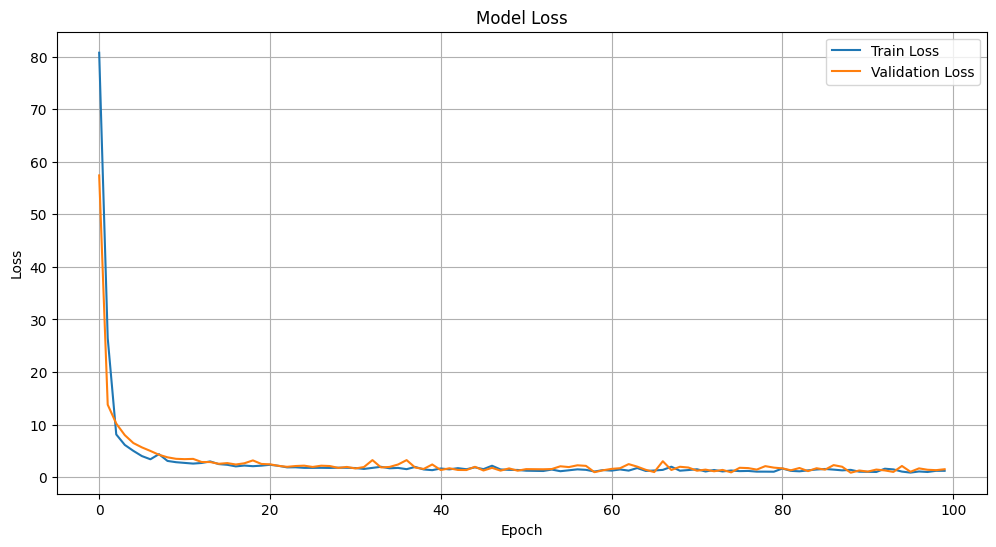

In [ ]:
# Plotting the training history
plt.figure(figsize=(12, 6))

# Plot training, validation, and test loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Pytorch

Streaming output truncated to the last 5000 lines.
         -6.5376e-02, -3.4452e-02,  2.1338e-02],
        [-4.2244e-02, -1.8939e-02, -3.5793e-02, -5.7594e-03, -1.1507e-02,
         -5.2118e-02, -3.2668e-02,  6.2311e-03],
        [ 5.7624e-02,  5.6915e-02,  2.9176e-02,  8.8667e-02,  1.8903e-02,
         -2.8930e-03, -2.4512e-02,  1.8567e-02],
        [ 8.2473e-02,  1.2639e-01,  7.1822e-02,  1.4797e-01,  8.6988e-02,
          2.9176e-02, -1.1603e-03,  3.9320e-02],
        [ 1.0416e-01,  8.6996e-02,  9.6452e-02,  1.2459e-01,  3.4634e-02,
          7.8266e-02, -3.2379e-02,  3.8971e-02]])
fc1.bias gradient: tensor([-0.0693, -0.0294,  0.0083, -0.0060, -0.0307, -0.0042, -0.0009, -0.0560,
        -0.0432,  0.0121, -0.0297, -0.0560,  0.0227, -0.1129, -0.0976,  0.0122,
        -0.0083, -0.0031, -0.0283, -0.1313, -0.0966, -0.0803, -0.0073,  0.0144,
        -0.0441,  0.0280,  0.0165, -0.0296,  0.0150, -0.0461,  0.0090, -0.0009,
        -0.0007, -0.0627, -0.1290, -0.0497, -0.1004, -0.0696, -0.058

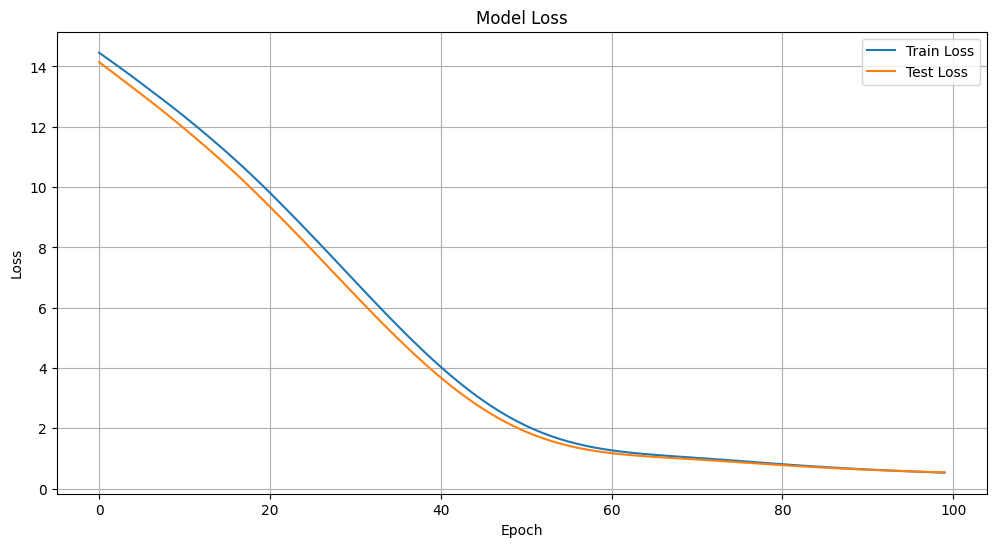

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define the model
# teman teman harus OOP
class PricePredictionModel(nn.Module):
    def __init__(self):
        super(PricePredictionModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = PricePredictionModel()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Track gradients
def print_gradients(model):
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f'{name} gradient: {param.grad}')

# Train the model
num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    # optimizer.step()
    # train_losses.append(loss.item())

    # Print gradients
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print_gradients(model)

    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_tensor)
    y_test_pred = model(X_test_tensor)

# Convert predictions to numpy arrays
y_train_pred = y_train_pred.numpy()
y_test_pred = y_test_pred.numpy()

# Calculate RMSE and R² score
rmse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_train_pred)))
rmse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred)))


print(f'RMSE (Train): {rmse_train:.2f}')
print(f'RMSE (Test): {rmse_test:.2f}')

# Plotting the training and test loss history
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Tentu, berikut adalah penjelasan rinci dari kode yang diberikan:

### 1. Mengimpor Pustaka yang Diperlukan

```python
import torch
import torch.nn as nn
import torch.optim as optim
```
- **torch**: Pustaka utama untuk komputasi tensor dan pengembangan model neural network.
- **torch.nn**: Pustaka untuk mendefinisikan dan bekerja dengan lapisan neural network.
- **torch.optim**: Pustaka untuk algoritma optimasi.


### 2. Mengubah Data Menjadi Tensor PyTorch

```python
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
```
- Mengubah numpy array menjadi tensor PyTorch untuk digunakan dalam pelatihan model.

### 2. Mendefinisikan Model

```python
class PricePredictionModel(nn.Module):
    def __init__(self):
        super(PricePredictionModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = PricePredictionModel()
```
- **PricePredictionModel**: Kelas yang mendefinisikan arsitektur model neural network dengan 3 lapisan penuh.
  - **fc1**: Lapisan penuh pertama dengan 64 neuron.
  - **fc2**: Lapisan penuh kedua dengan 32 neuron.
  - **fc3**: Lapisan penuh ketiga dengan 1 neuron (output).

### 3. Mendefinisikan Fungsi Kerugian dan Optimizer

```python
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
```
- **nn.MSELoss**: Fungsi kerugian Mean Squared Error, cocok untuk tugas regresi.
- **optim.Adam**: Optimizer Adam dengan laju pembelajaran 0.001.

### 4. Melatih Model

```python
num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
```
- Melakukan pelatihan model selama 100 epoch.
- **model.train()**: Mengatur model ke mode pelatihan.
- **optimizer.zero_grad()**: Menghapus gradien sebelumnya.
- **loss.backward()**: Menghitung gradien.
- **optimizer.step()**: Memperbarui parameter model.
- **train_losses** dan **test_losses**: Menyimpan kerugian untuk setiap epoch.
- **model.eval()**: Mengatur model ke mode evaluasi.
- **torch.no_grad()**: Mematikan pelacakan gradien selama evaluasi.

### 4. Mengevaluasi Model

```python
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_tensor)
    y_test_pred = model(X_test_tensor)
```
- Melakukan prediksi pada data pelatihan dan pengujian tanpa pelacakan gradien.



### Penjelasan Tambahan

1. **Fungsi `print_gradients`**:
   - Fungsi ini mencetak gradien dari setiap parameter model. Digunakan untuk melacak dan memantau nilai gradien selama pelatihan.
   
2. **Modifikasi dalam Loop Pelatihan**:
   - Setiap epoch, setelah `loss.backward()`, gradien dicetak menggunakan `print_gradients(model)`.

Dengan melacak gradien, Anda bisa memeriksa apakah gradien menjadi sangat kecil (vanishing gradients) atau sangat besar (exploding gradients), yang dapat menunjukkan masalah dalam pelatihan model. Melacak gradien juga membantu memastikan bahwa gradien mengalir dengan benar melalui jaringan selama backpropagation.